In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
method='KNN'

In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Load your data into a Pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/miniproject/3D_dataset_Authentic/ab.csv')


# Split the data into features and labels
# X = data.iloc[:,[0,8,16,24,32,40,48,56,64,72,80,88,96]]  # Assuming 'label' is the name of the column containing the target labels
X = data.iloc[:,[48,56,64,96]]  
print(X)

        ch0/ec  ch0/lc  ch0/pc  ch0/cn0
0          0.0     0.0     0.0      0.0
1          0.0     0.0     0.0      0.0
2          0.0     0.0     0.0      0.0
3          0.0     0.0     0.0      0.0
4          0.0     0.0     0.0      0.0
...        ...     ...     ...      ...
158170     0.0     0.0     0.0      0.0
158171     0.0     0.0     0.0      0.0
158172     0.0     0.0     0.0      0.0
158173     0.0     0.0     0.0      0.0
158174     0.0     0.0     0.0      0.0

[158175 rows x 4 columns]


In [8]:
y = data.iloc[:,104]
y.head()


0    0
1    0
2    0
3    0
4    0
Name: ch0/o, dtype: int64

AttributeError: ignored

In [ ]:


# Perform data normalization using Min-Max scaling
# df =data.drop(0, axis=0)
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Handle missing values by filling them with the mean of the respective column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_normalized)

# Convert the preprocessed data back to a DataFrame
X_preprocessed = pd.DataFrame(X_imputed, columns=X.columns)

# Split the preprocessed data into training, validation, and testing sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X_preprocessed, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Now you can use X_train, y_train, X_val, y_val, X_test, y_test as inputs for your KNN model
X_train = X_train.to_numpy()
print(X_train)
# Train and evaluate your KNN model
if(method=='KNN'): clf = KNeighborsClassifier(n_neighbors=5)  # You can adjust the hyperparameter n_neighbors as needed
if(method=='RF'): clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=10, min_samples_split=2, min_samples_leaf=1)  # You can adjust the hyperparameter n_neighbors as needed
if(method=='DT'): clf = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, min_samples_leaf=1)  # You can adjust the hyperparameter n_neighbors as needed
if(method=='GB'): clf = GaussianNB() # You can adjust the hyperparameter n_neighbors as needed
if(method=='SVM'): clf = LinearSVC(C=1.0, penalty='l2', max_iter=1000)  # You can adjust the hyperparameter n_neighbors as needed

  # You can adjust the hyperparameter n_neighbors as needed



[[0.         0.28611178 0.1773779  ... 0.49991637 0.31203836 0.        ]
 [0.33333333 0.80082622 0.99960591 ... 0.47683603 0.76925475 0.88131071]
 [1.         0.69653474 0.29796497 ... 0.08691    0.77313121 0.94406722]
 ...
 [0.         0.28611178 0.1773779  ... 0.49991637 0.31203836 0.        ]
 [0.         0.28611178 0.1773779  ... 0.49991637 0.31203836 0.        ]
 [1.         0.70578147 0.29745969 ... 0.47502858 0.76661706 0.94655345]]


In [ ]:

clf.fit(X_train, y_train)
X_val = X_val.to_numpy()
# Make predictions on the validation set
y_val_pred = clf.predict(X_val)

# Evaluate the performance of the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, average='weighted')  # Use 'weighted' for multiclass
recall = recall_score(y_val, y_val_pred, average='weighted')  # Use 'weighted' for multiclass
f1 = f1_score(y_val, y_val_pred, average='weighted')  
# You can also perform hyperparameter tuning, model interpretability, and other model evaluation tasks as needed

# Once you have finalized your model, you can use it for inference on new, unseen data

KeyboardInterrupt: ignored

In [ ]:
y.unique()


array([0, 2, 3, 1])

In [ ]:
from sklearn.model_selection import ShuffleSplit
kfold_validation=ShuffleSplit(n_splits=10,test_size=0.3)
from sklearn.decomposition import PCA
scaler = MinMaxScaler()
X = X.to_numpy()
X = scaler.fit_transform(X)
pca = PCA(n_components=2)

# Fit the data to the PCA model
pca.fit(X)

# Transform the data to the principal components
transformed_data = pca.transform(X)
knn = cross_val_score(KNeighborsClassifier(n_neighbors=5),transformed_data,y,cv=kfold_validation)
rf = cross_val_score(RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=10, min_samples_split=2, min_samples_leaf=1),transformed_data,y,cv=kfold_validation)
dt = cross_val_score(DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, min_samples_leaf=1),transformed_data,y,cv=kfold_validation)
gb = cross_val_score(GaussianNB(),transformed_data,y,cv=kfold_validation) # You can adjust the hyperparameter n_neighbors as needed
svm = cross_val_score(LinearSVC(C=1.0, penalty='l2', max_iter=1000),transformed_data,y,cv=kfold_validation)
print('knn =' + np.mean(knn))

print('rf =' + np.mean(rf))

print('dt =' + np.mean(dt))

print('gb =' + np.mean(gb))

print('svm ='+np.mean(svm))

ax = plt.axes(projection='3d')

ax.scatter3D(transformed_data[:,0],transformed_data[:,1],c=y);


In [ ]:

import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

# # Sample data
# X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])  # Input features
# y = np.array([0, 1, 0])  # Target variable

# # Instantiate SelectKBest with ANOVA F-value scoring
selector = SelectKBest(score_func=f_classif, k=2) 

# Fit the data to the selector
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Print the selected feature indices and scores
print("Selected Feature Indices:")
print(X_new)
print(selected_feature_indices)
print("\nFeature Scores:")
print(selector.scores_)

In [9]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

kfold_validation=ShuffleSplit(n_splits=10,test_size=0.3)

knn = cross_val_score(KNeighborsClassifier(n_neighbors=5),X,y,cv=kfold_validation)
rf = cross_val_score(RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=10, min_samples_split=2, min_samples_leaf=1),X,y,cv=kfold_validation)
dt = cross_val_score(DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, min_samples_leaf=1),X,y,cv=kfold_validation)
gb = cross_val_score(GaussianNB(),X,y,cv=kfold_validation) # You can adjust the hyperparameter n_neighbors as needed
svm = cross_val_score(LinearSVC(C=1.0, penalty='l2', max_iter=1000),X,y,cv=kfold_validation)




/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

In [10]:

print( np.mean(knn))

print( np.mean(rf))

print( np.mean(dt))

print( np.mean(gb))

print(np.mean(svm))

0.8419783786061998
0.8625608496828441
0.8601310770657282
0.6790571723600193
0.8188881630244664


0.9152930267843973
0.9265378374391503
0.9291952036752154
0.7425220744736898
0.8594272227256445


Selected Feature Indices:
[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[ 8 12]

Feature Scores:
[1.10346661e+04 4.30338021e+03 9.83581773e+03 3.48901259e+03
 1.16673348e+04 5.25340005e+03 1.45935637e+04 1.45325357e+04
 1.48708700e+04 5.60148782e+00 7.59378082e+02 4.64379910e+03
 1.62577564e+04]


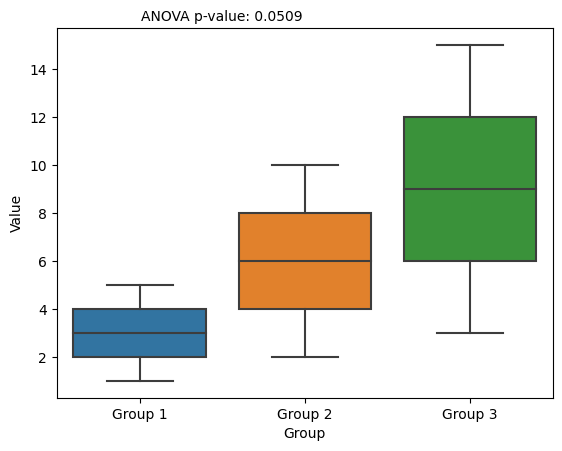

In [71]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Sample data
group1 = [1, 2, 3, 4, 5]
group2 = [2, 4, 6, 8, 10]
group3 = [3, 6, 9, 12, 15]

# Perform ANOVA
fvalue, pvalue = stats.f_oneway(X)

# Combine data for boxplot
data = np.concatenate([group1, group2, group3])
labels = ['Group 1'] * len(group1) + ['Group 2'] * len(group2) + ['Group 3'] * len(group3)

# Create boxplot
sns.boxplot(x=labels, y=data)

# Set plot title and labels
plt.title('')
plt.xlabel('Group')
plt.ylabel('Value')

# Show the ANOVA result on the plot
plt.text(0.5, np.max(data) + 1, f'ANOVA p-value: {pvalue:.4f}', ha='center')

# Display the plot
plt.show()

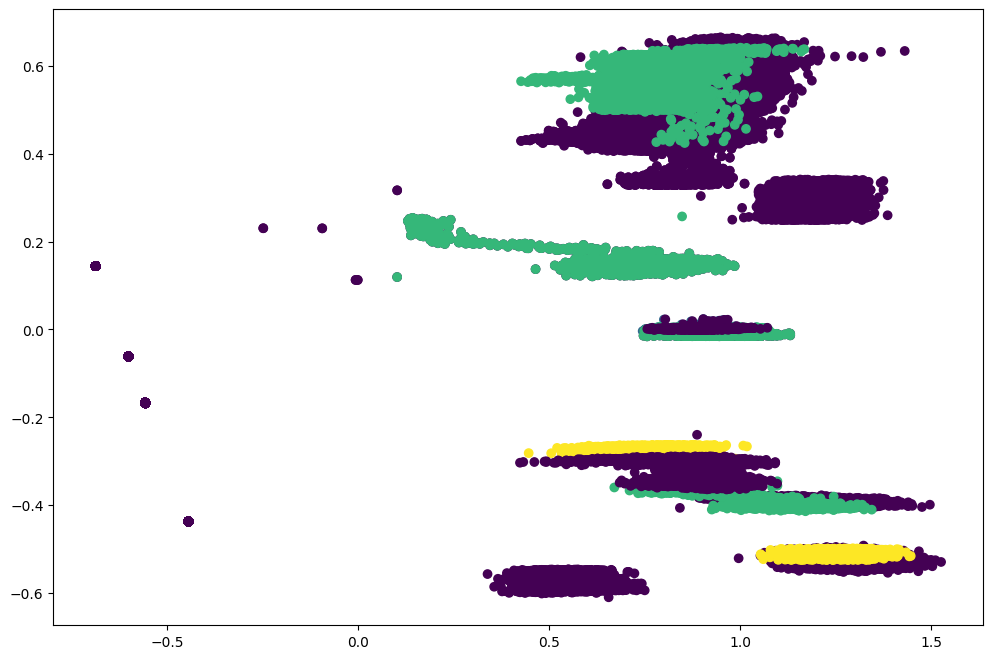

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(transformed_data[:,0],transformed_data[:,1],c=y)

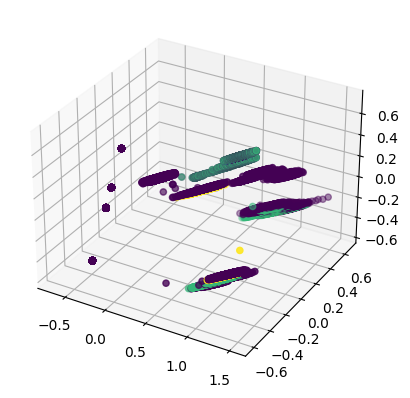

[0.91387267 0.91507386 0.91650686 0.9169494  0.91486313 0.91732873
 0.91406234 0.9156007  0.91439951 0.91579036]
0.9154447558636967


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
print(f'Accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1: {f1}')

Accuracy: 0.8736407316867572
precision: 0.8300802303169719
recall: 0.8736407316867572
f1: 0.8354186094812032


In [ ]:
!pip install joblib
from joblib import dump
dump(clf,'/content/drive/MyDrive/miniproject/zero.joblib')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


['/content/drive/MyDrive/miniproject/zero.joblib']

<ipython-input-2-86ae03af2d56>:4: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/3D_dataset_Authentic/unga.csv')  # Replace 'your_dataset.csv' with the name of your dataset file


In [ ]:
#@title Trap-Track
FEATURE = 'TCD' #@param ['PRN', 'Carrier_Doppler_hz','Pseudorange_m','RX_time','TOW_at_current_symbol_s','Carrier_phase_cycles','EC','LC','PC','PIP','PQP','TCD','CN0']
VALUE = -5252.33354112 #@param {type:"number"}
Output = None #@param { 'true','false'} {type:'raw'}y

    


NameError: ignored

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 68.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.7/129.7 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.5/140.5 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.2/286.2 kB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8

NameError: ignored

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Accuracy: 0.9303860693788808


TclError: ignored

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 76.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 104.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.3 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=8e493cd0b815a1538cfcac3b2d409b4f8d00f6bc252ea8e39c97104393fd53cd
  Stored in directory: /root/.cache/pip/wheels/2d/f0/a8/1094fca7a7e5d0d12ff56e0c64675d72aa5cc81a5fc200e849
Successfully built validators


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


ImportError: ignored

In [ ]:
import streamlit as st
import joblib
import numpy as np

def main():
    # Load the trained decision tree model
    model = joblib.load('/content/drive/MyDrive/Colab Notebooks/DT.ipynb')

    # Create a streamlit web app
    st.title('UAV Spoofing Detection')
    st.header('Enter the channels and features')

    # Create input fields for each channel and feature
    # channel1 = st.number_input('Channel 1')
    # channel2 = st.number_input('Channel 2')
    # channel3 = st.number_input('Channel 3')
    # channel4 = st.number_input('Channel 4')
    # channel5 = st.number_input('Channel 5')
    # channel6 = st.number_input('Channel 6')
    # channel7 = st.number_input('Channel 7')
    # channel8 = st.number_input('Channel 8')

    feature1 = st.number_input('Feature 1')
    feature2 = st.number_input('Feature 2')
    feature3 = st.number_input('Feature 3')
    feature4 = st.number_input('Feature 4')
    feature5 = st.number_input('Feature 5')
    feature6 = st.number_input('Feature 6')
    feature7 = st.number_input('Feature 7')
    feature8 = st.number_input('Feature 8')
    feature9 = st.number_input('Feature 9')
    feature10 = st.number_input('Feature 10')
    feature11 = st.number_input('Feature 11')
    feature12 = st.number_input('Feature 12')
    feature13 = st.number_input('Feature 13')

    # Create a prediction button
    if st.button('Predict'):
        # Convert the inputs to a numpy array
        inputs = np.array([[channel1, channel2, channel3, channel4, channel5, channel6, channel7, channel8, feature1, feature2, feature3, feature4, feature5, feature6, feature7, feature8, feature9, feature10, feature11, feature12, feature13]])

        # Make a prediction using the decision tree model
        prediction = model.predict(inputs)

        # Show the prediction result
        if prediction == 0:
            st.write('The UAV is not being spoofed')
        else:
            st.write('The UAV is being spoofed')


b'{"nbformat":4,"nbformat_minor":0,"metadata":{"colab":{"provenance":[],"authorship_tag":"ABX9TyPQQUhc2qTwniJbZ21qC3sn"},"kernelspec":{"name":"python3","display_name":"Python 3"},"language_info":{"name":"python"}},"cells":[{"cell_type":"code","execution_count":1,"metadata":{"colab":{"base_uri":"https://localhost:8080/"},"id":"MTYkrn2sfWJ3","executionInfo":{"status":"ok","timestamp":1680165720848,"user_tz":-330,"elapsed":23568,"user":{"displayName":"Reehanth Rapaka","userId":"07978165135446552223"}},"outputId":"47147d6e-176f-4c92-9cfe-7d78eb877d09"},"outputs":[{"output_type":"stream","name":"stdout","text":["Mounted at /content/drive\\n"]}],"source":["from google.colab import drive\\n","drive.mount(\'/content/drive\')"]},{"cell_type":"code","source":["!pip install scikit-learn"],"metadata":{"colab":{"base_uri":"https://localhost:8080/"},"id":"dQ4mVnM1faP7","executionInfo":{"status":"ok","timestamp":1680165727672,"user_tz":-330,"elapsed":4243,"user":{"displayName":"Reehanth Rapaka","user

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Streamlit requires raw Python (.py) files, but the provided file has no extension.
For more information, please see https://docs.streamlit.io


KeyError: ignored